In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [2]:
# Chargement des données depuis le fichier CSV
data = pd.read_csv(r'..\01_Datasets\Dataset_Simple_V0.csv', delimiter=';')



In [3]:
# Conversion des colonnes de dates en format datetime
data['DateDebutActe'] = pd.to_datetime(data['DateDebutActe'])
data['DateFinActe'] = pd.to_datetime(data['DateFinActe'])


In [4]:
# Encodage des caractéristiques
label_encoders = {}
for column in ['Service', 'Phase_Parcours', 'Activite', 'Dimension_Parcours', 'Ref_Acte', 'Type_Sequence']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])




In [5]:
# Normalisation des colonnes de dates
scaler = StandardScaler()
data[['DateDebutActe', 'DateFinActe']] = scaler.fit_transform(data[['DateDebutActe', 'DateFinActe']])


In [6]:
# Construction des séquences  pour chaque patient
sequences = []
for _, group in data.groupby('NIP'):
    sequence = group.sort_values(by='DateDebutActe')['Ref_Acte'].tolist()  # Séquence d'actes médicaux
    sequences.append(sequence)


In [7]:
# Padding des séquences pour une longueur fixe
max_sequence_length = max(len(seq) for seq in sequences)
padded_sequences = np.array([seq + [0]*(max_sequence_length-len(seq)) for seq in sequences])

In [8]:
max_sequence_length

6

In [9]:
#  données  entraînement et de test
X_train, X_test = train_test_split(padded_sequences, test_size=0.2, random_state=42)

y_train = np.random.randint(2, size=(X_train.shape[0], 1))
y_test = np.random.randint(2, size=(X_test.shape[0], 1))


In [10]:
# Construction du modèle RNN
model = Sequential([
    LSTM(64, input_shape=(max_sequence_length, 1), return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# Entraînement du modèle
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
1/1 [==============================] - 8s 8s/step - loss: 0.6434 - accuracy: 1.0000 - val_loss: 0.6391 - val_accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 39ms/step - loss: 0.6545 - accuracy: 0.5000 - val_loss: 0.6406 - val_accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 39ms/step - loss: 0.6905 - accuracy: 0.5000 - val_loss: 0.6460 - val_accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 39ms/step - loss: 0.6633 - accuracy: 0.5000 - val_loss: 0.6514 - val_accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 46ms/step - loss: 0.7475 - accuracy: 0.5000 - val_loss: 0.6541 - val_accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 37ms/step - loss: 0.6794 - accuracy: 0.5000 - val_loss: 0.6561 - val_accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 37ms/step - loss: 0.7121 - accuracy: 0.5000 - val_loss: 0.6592 - val_accuracy: 1.0000
Epoch 8/100
1/1 [=====

In [12]:
# Évaluation du modèle
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

1/1 [==============================] - 0s 31ms/step - loss: 0.6856 - accuracy: 1.0000
Test Accuracy: 1.0


In [13]:
import matplotlib.pyplot as plt

Epoch 1/100
1/1 [==============================] - 0s 76ms/step - loss: 0.7179 - accuracy: 0.5000 - val_loss: 0.6994 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 41ms/step - loss: 0.6736 - accuracy: 1.0000 - val_loss: 0.6978 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 44ms/step - loss: 0.7020 - accuracy: 0.5000 - val_loss: 0.6962 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 46ms/step - loss: 0.6781 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 45ms/step - loss: 0.7048 - accuracy: 0.0000e+00 - val_loss: 0.6914 - val_accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 44ms/step - loss: 0.6857 - accuracy: 0.5000 - val_loss: 0.6889 - val_accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 37ms/step - loss: 0.7033 - accuracy: 0.5000 - val_loss: 0.6881 - val_accuracy: 1.0000


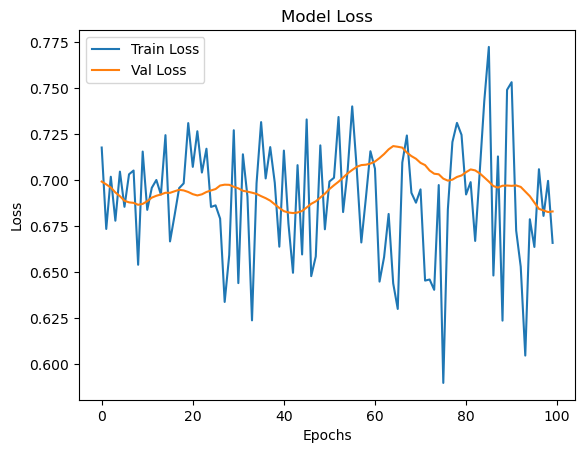

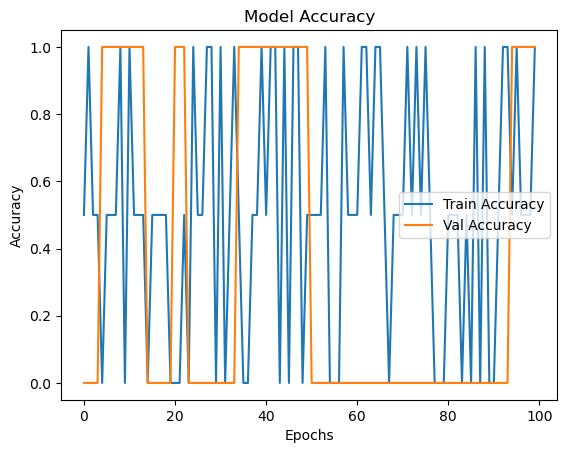

In [14]:
# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Extraction de la perte et de l'exactitude pour l'ensemble d'entraînement et de validation
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Affichage des courbes de perte
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Affichage des courbes d'exactitude
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()